## ML Supervisionado para predição

### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

### CARREGAMENTO DOS DADOS

In [2]:
from google.colab import files
uploaded = files.upload()


Saving social_media_vs_productivity.csv to social_media_vs_productivity (2).csv


In [3]:
df = pd.read_csv('social_media_vs_productivity.csv')

### EDA

In [4]:
# Visualizando as primeiras entradas
df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [5]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [6]:
# Verificando valores nulos
df.isnull().sum()

,0
age,0
gender,0
job_type,0
daily_social_media_time,2765
social_platform_preference,0
number_of_notifications,0
work_hours_per_day,0
perceived_productivity_score,1614
actual_productivity_score,2365
stress_level,1904


In [7]:
# Descrição estatística básica
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


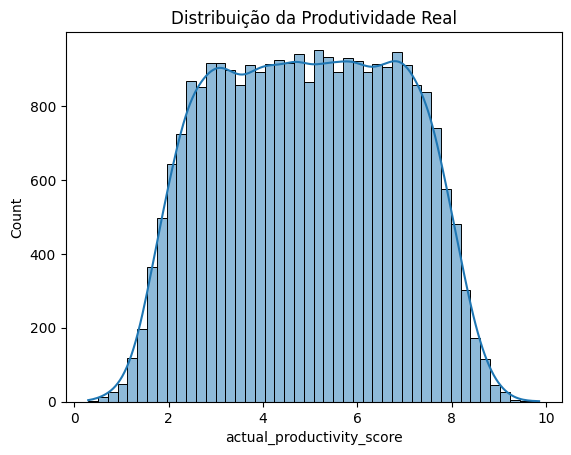

In [8]:
# Histograma do score real de produtividade
sns.histplot(data=df, x='actual_productivity_score', kde=True)
plt.title('Distribuição da Produtividade Real')
plt.show()

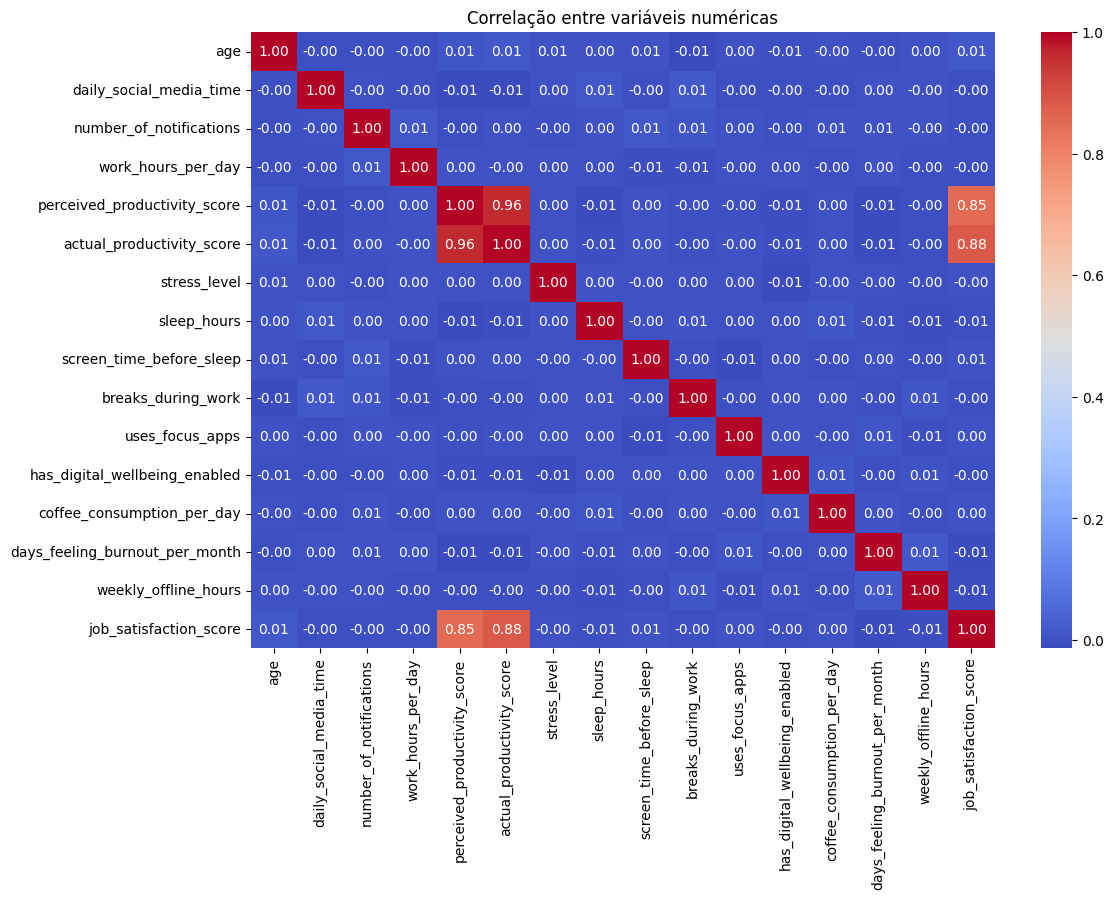

In [9]:
# Correlação entre variáveis numéricas
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()

### PRÉ-PROCESSAMENTO

In [10]:
# Preenchendo valores faltantes com mediana para variáveis numéricas
df.fillna(df.median(numeric_only=True), inplace=True)

In [11]:
# Codificando variáveis categóricas
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['job_type'] = le.fit_transform(df['job_type'])
df['social_platform_preference'] = le.fit_transform(df['social_platform_preference'])

In [12]:
# Selecionando colunas para input e target
X = df.drop(columns=['actual_productivity_score'])
y = df['actual_productivity_score']

In [13]:
# Binarizando target para classificação
# Classificação: alta produtividade (>6.5), média (4.5-6.5), baixa (<4.5)
y_class = pd.cut(y, bins=[-1,4.5,6.5,10], labels=[0,1,2])

In [14]:
# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.3, random_state=42)

### TREINAMENTO DE MODELOS

In [16]:
# Modelo 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Modelo 2: Regressão Logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### AVALIAÇÃO E COMPARAÇÃO DE MODELOS


In [18]:
# Predições
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

In [19]:
# Acurácia
rf_acc = accuracy_score(y_test, rf_pred)
lr_acc = accuracy_score(y_test, lr_pred)

In [20]:
print("Acurácia Random Forest:", rf_acc)
print("Acurácia Regressão Logística:", lr_acc)

Acurácia Random Forest: 0.8276666666666667
Acurácia Regressão Logística: 0.8167777777777778


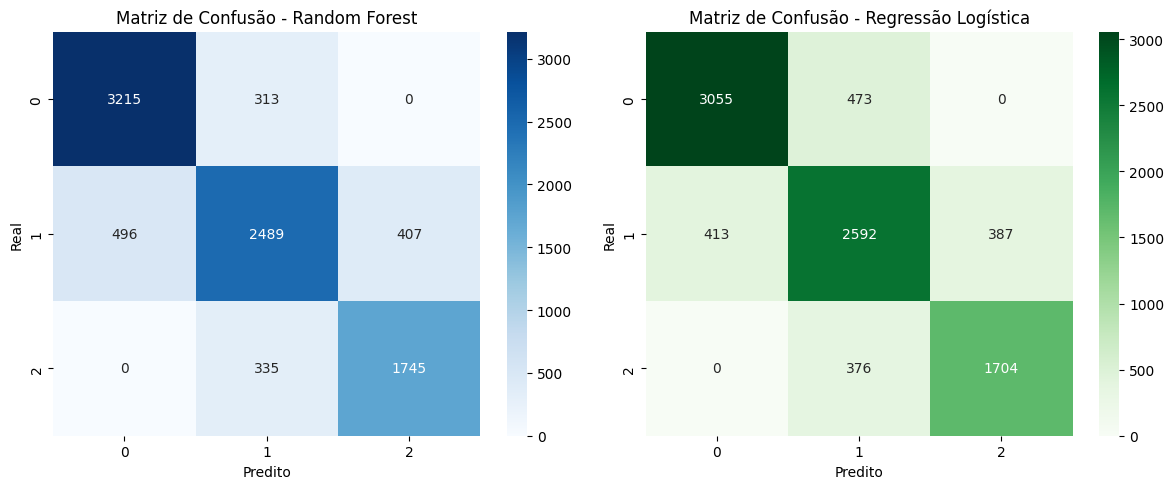

In [21]:
# Matrizes de confusão lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Random Forest')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Regressão Logística')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')
plt.tight_layout()
plt.show()

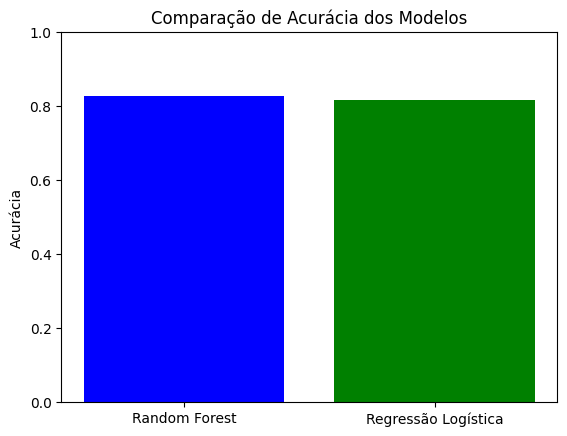

In [22]:
# Comparação visual das acurácias
plt.bar(['Random Forest', 'Regressão Logística'], [rf_acc, lr_acc], color=['blue', 'green'])
plt.title('Comparação de Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.show()

### IMPORTÂNCIA DAS VARIÁVEIS (Random Forest)

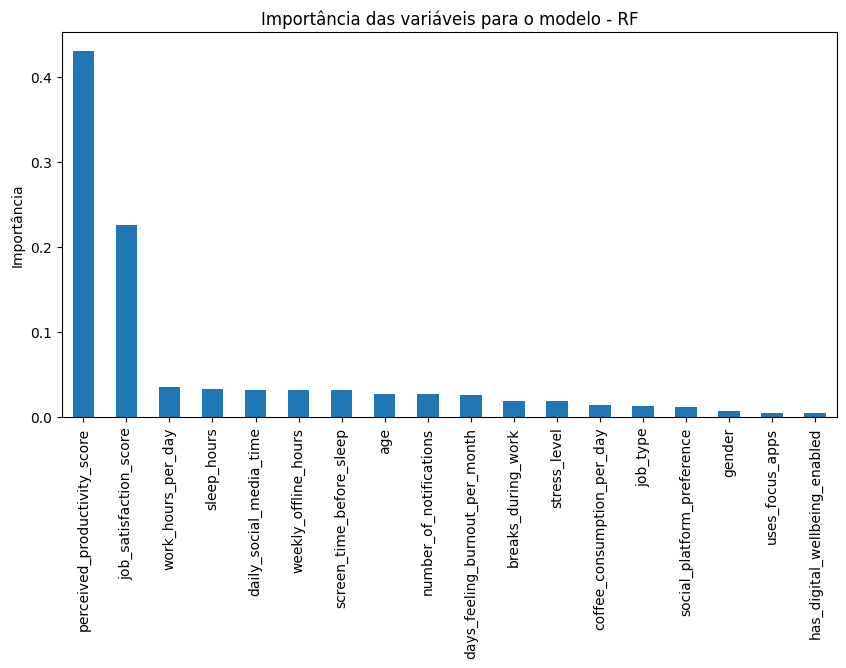

In [23]:
importances = rf_model.feature_importances_
features = df.drop(columns=['actual_productivity_score']).columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,5))
feat_imp.plot(kind='bar')
plt.title('Importância das variáveis para o modelo - RF')
plt.ylabel('Importância')
plt.show()

### EXPORTAÇÃO DO MODELO

In [24]:
# Salvando modelo e scaler
joblib.dump(rf_model, 'modelo_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']